3 categories

1. processed,

2. offramped.

partially processed,

alot of different statuses.

processsign reviewed,

H is pass fail.

How many yes, no, blanks in H

 

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import glob

date='08-25'

path = r'C:\Users\VAAACShuffM1\Desktop\Validation_Sheets' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

li    

csv2 = pd.read_excel('25AUG2020_Daily_Prod_Report.xlsx', sheet_name='Transactions - All Invoicing')

lencsv2 = len(csv2)

In [2]:
df = pd.concat(li, axis=0, ignore_index=True)

df

C:\Users\VAAACShuffM1\Downloads\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Are all notes correct?,Are all required fields completed? (offramp if no),Are all the document properly uploaded into the eFolder?,CMP packet ID,Claimant POA updated?,Clamaint POA already of record?,Classification,Date,Document Type,Document Type.1,...,Unnamed: 35,VA_HOSPITALIZATION,VBA Notes,Veteran POA updated?,Was the 0966 processed but then offramped?,Was the 21-22 (or other document) managed in evidence correctly?,Was the correct Veteran pulled up in VBMS?,Was the packet indexed with the correct Veteran's information?,Yes,is the claimant listed as dependent in VBMS?
0,yes,no,yes,9915745.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,PAYMENT_ISSUE,"bot added hardship flash, annotated notes, add...",NaN,NaN,NaN,yes,yes,no,NaN
1,NaN,no,NaN,9921769.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,no contentions filled out on form. packet off...,NaN,NaN,NaN,yes,yes,NaN,NaN
2,yes,yes,yes,9917849.0,NaN,NaN,noted to exisitng list of possible prorcessed ...,NaN,526ez,NaN,...,NaN,NaN,"bot established 020, annotated notes, added ev...",NaN,NaN,NaN,yes,yes,NaN,NaN
3,NaN,NaN,NaN,21689334.0,NaN,NaN,categorized as a mis-read,NaN,526ez,NaN,...,NaN,NaN,"526 is FDC, not bdd as stated in event notes. ...",NaN,NaN,NaN,yes,yes,NaN,NaN
4,NaN,NaN,NaN,21694440.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,Veteran deceased. pending 140. packet would ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,9912522.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,no veteran signature (alterantive signature bo...,NaN,NaN,NaN,Yes,Yes,NaN,NaN
6,yes,no,yes,9920117.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,"Bot established 020, annotated notes, added ev...",NaN,NaN,NaN,yes,yes,NaN,NaN
7,NaN,no,NaN,21689082.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,no veteran signature (alterantive signature bo...,NaN,NaN,NaN,yes,yes,NaN,NaN
8,NaN,no,NaN,9911058.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,"signature is in packet, but barely visible. b...",NaN,NaN,NaN,yes,yes,NaN,NaN
9,NaN,NaN,NaN,21690256.0,NaN,NaN,NaN,NaN,526ez,NaN,...,NaN,NaN,"IDES selected, auto off ramp",NaN,NaN,NaN,yes,yes,NaN,NaN


In [3]:
df['Processed According to Requirements?'] = df['Processed According to Requirements?'].str.replace('yes', 'Yes')

df['Processed According to Requirements?'] = df['Processed According to Requirements?'].str.replace('no', 'No')

df_Yes = df[df['Processed According to Requirements?']=='Yes'] 

df_No = df[df['Processed According to Requirements?']=='No'] 

In [5]:
#sper = (len(csv)/len(csv2))*100

In [6]:
grouped_Yes = df_Yes.groupby(['Status']).size()

grouped_No = df_No.groupby(['Status']).size()

grouped_Yes = pd.DataFrame(grouped_Yes)

grouped_Yes.columns=['Yes']

grouped_No = pd.DataFrame(grouped_No)

grouped_No.columns=['No']


In [7]:
y_n = pd.concat([grouped_Yes, grouped_No], axis=1)

y_n

,Yes,No
Status,,
OFF RAMPED,33,4
OFFRAMPED,19,2
PROCESSED,196,41
PROCESSING,24,4
REVIEWED,17,2


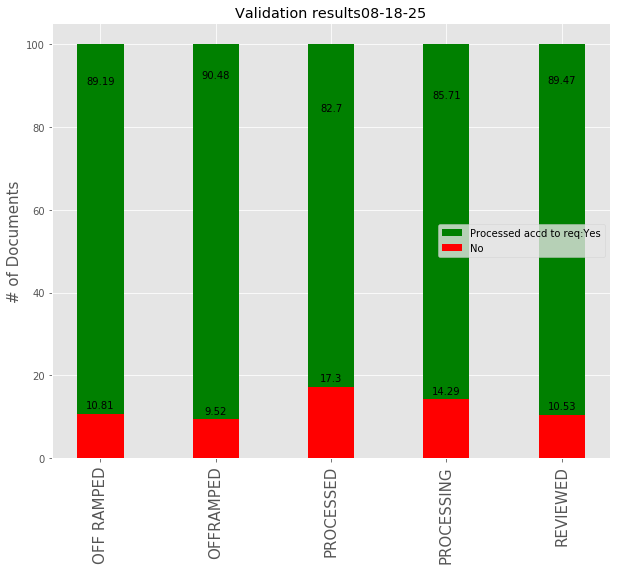

In [39]:
x=np.arange(len(y_n))

plt.figure(figsize=[10,8])

Yes_per =y_n.Yes/(y_n.No+y_n.Yes)*100

Yes_per =Yes_per.round(2)

no_per = y_n.No/(y_n.Yes+y_n.No)*100

no_per=no_per.round(2)



rects1 = plt.bar(x, Yes_per, label='Processed accd to req:Yes', color='g', width=.4, bottom=no_per)

rects2 = plt.bar(x,no_per , label='No', color='r', width=.4)

plt.xticks(x, y_n.index, rotation='vertical', fontsize=15)



def autolabel(rects):

    #"""Attach a text label above each bar in *rects*, displaying its height."""

    for rect in rects:

        height = rect.get_height()

        plt.annotate('{}'.format(height),

                    xy=(rect.get_x() + rect.get_width() / 2, height),

                    xytext=(0, 3),  # 3 points vertical offset

                    textcoords="offset points",

                    ha='center', va='bottom')

 

 

autolabel(rects1)

autolabel(rects2)


plt.style.use('ggplot')

plt.ylabel('# of Documents', fontsize=15)

plt.title('Validation results08-18-25')

plt.legend(loc=7)

#plt.text(x=.7, y=19, s='SP=')

#plt.text(x=.8, y=19, s=sper)

plt.savefig('Validation Graphs/Validation results 08.18-08.25.png', bbox_inches='tight')

In [5]:
#Daily


import pandas as pd

csv_8_25 = pd.read_csv('Validation_Sheets\Weekly\Validation -8-25.csv')

df_day_25 = pd.DataFrame(csv_8_25)

df_day_25



csv_8_24 = pd.read_csv('Validation_Sheets\Weekly\Validation -8-24.csv')

df_day_24 = pd.DataFrame(csv_8_24)

df_day_24



,Reviewer,CMP packet ID,Document Type,Status,Event Notes,Classification,VBA Notes,Processed According to Requirements?,Was the packet indexed with the correct Veteran's information?,Was the correct Veteran pulled up in VBMS?,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Yes,Unnamed: 33,Unnamed: 34,VA_HOSPITALIZATION
0,AC,21702160.0,RM,PROCESSED,Add Document - Document Added,NON_ESS,"packet added to evidence, notes, eFolder. No ...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,PAYMENT_ISSUE
1,AC,21701630.0,RM,PROCESSED,Add Document - Document Added,ESS,"packet added to evidence, notes, eFolder. Pen...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC,339534.0,RM,PROCESSED,Add Document - Document Added,ESS,"packet added to evidence, notes, eFolder. No ...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AC,339749.0,RM,PROCESSED,Add Document - Document Added,ESS,"packet added to evidence, notes, eFolder. No p...",yes,no,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AC,9944640.0,526ez,PROCESSED,Add Document - Document Added,NaN,"Bot est. 110, added contentions. packet added...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AC,21703882.0,RM,PROCESSED,Add Document - Document Added,ESS,"packet added to evidence, notes, eFolder. Pend...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AC,21703845.0,RM,PROCESSED,Add Document - Document Added,ESS,"packet added to evidence, notes, eFolder. Pend...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AC,9939508.0,526ez,PROCESSED,Add Document - Document Added,NaN,"packet added to evidence, notes, eFolder. Pend...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AC,21706367.0,526ez,PROCESSED,Add Document - Document Added,NaN,"bot est 020, added notes, eFolder, but failed ...",no,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AC,21704320.0,RM,PROCESSED,Add Document - Document Added,ESS,"packet added to evidence, notes, efolder, pend...",yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_day['Processed According to Requirements?'] = df_day['Processed According to Requirements?'].str.replace('yes', 'Yes')

df_day['Processed According to Requirements?'] = df_day['Processed According to Requirements?'].str.replace('no', 'No')

df_day_Yes = df_day[df_day['Processed According to Requirements?']=='Yes'] 

df_day_No = df_day[df_day['Processed According to Requirements?']=='No'] 

In [18]:
grouped_Yes = df_day_Yes.groupby(['Status']).size()

grouped_No = df_day_No.groupby(['Status']).size()

grouped_Yes = pd.DataFrame(grouped_Yes)

grouped_Yes.columns=['Yes']

grouped_No = pd.DataFrame(grouped_No)

grouped_No.columns=['No']


In [22]:
y_n_day = pd.concat([grouped_Yes, grouped_No], axis=1)

y_n_day

,Yes,No
Status,,
OFF RAMPED,10,1
OFFRAMPED,19,2
PROCESSED,111,19


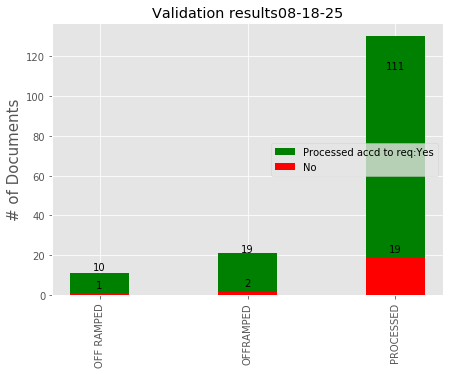

In [24]:
x=np.arange(len(y_n_day))

plt.figure(figsize=[7,5])

rects1 = plt.bar(x, y_n_day.Yes, label='Processed accd to req:Yes', color='g', width=.4, bottom=y_n_day.No)

rects2 = plt.bar(x, y_n_day.No, label='No', color='r', width=.4)



plt.xticks(x, y_n_day.index, rotation='vertical')



def autolabel(rects):

    #"""Attach a text label above each bar in *rects*, displaying its height."""

    for rect in rects:

        height = rect.get_height()

        plt.annotate('{}'.format(height),

                    xy=(rect.get_x() + rect.get_width() / 2, height),

                    xytext=(0, 3),  # 3 points vertical offset

                    textcoords="offset points",

                    ha='center', va='bottom')

 

 

autolabel(rects1)

autolabel(rects2)


plt.style.use('ggplot')

plt.ylabel('# of Documents', fontsize=15)

plt.title('Validation results08-18-25')

plt.legend(loc=7)

#plt.text(x=.7, y=19, s='SP=')

#plt.text(x=.8, y=19, s=sper)

#Dailyplt.savefig('Validation Graphs/Validation results' +date +'.png', bbox_inches='tight')